## Comparative analysis of border and non-border states in Mexico 

#### We analyze how employment, wages and the number of factories in Mexico evolved between 2007 and 2021. Also between 2016 and 2021

#### The border states are: Baja California, Sonora, Tamaulipas, Coahuila, Chihuahua and Nuevo Leon.

In [1]:
#import libraries
import pandas as pd
import numpy as np
import re

In [2]:
#Open Manufacturing workers data
df = pd.read_csv("data/workers-factories-wages-mexico-annual.csv")
df

,Year,State,Border,Jobs,Factories,Average wage
0,2007,Total nacional,No,1902121.0,5140.0,13120.12137
1,2008,Total nacional,No,1738182.0,5254.0,13360.18494
2,2009,Total nacional,No,1645291.0,5214.0,14170.40792
3,2010,Total nacional,No,1810482.0,5108.0,13945.50058
4,2011,Total nacional,No,1879114.0,5079.0,14183.43239
...,...,...,...,...,...,...
280,2017,Otras entidades federativas,No,134260.0,266.0,13080.53332
281,2018,Otras entidades federativas,No,143292.0,264.0,12842.36016
282,2019,Otras entidades federativas,No,142102.0,267.0,12634.71062
283,2020,Otras entidades federativas,No,135569.0,264.0,14349.70094


In [3]:
#Compare change in employment, factory and salaries between border and non-border states
df2 = pd.DataFrame()
df2 ["Jobs-Border"] = list(df.query("Border == 'Yes'").groupby("Year")["Jobs"].agg("sum"))
df2 ["Factories-Border"] = list(df.query("Border == 'Yes'").groupby("Year")["Factories"].agg("sum"))
df2 ["Wages-Border"] = list(df.query("Border == 'Yes'").groupby("Year")["Average wage"].agg("mean"))
df2 ["Jobs-NoBorder"] = list(df.query("Border == 'No'").groupby("Year")["Jobs"].agg("sum"))
df2 ["Factories-NoBorder"] = list(df.query("Border == 'No'").groupby("Year")["Factories"].agg("sum"))
df2 ["Wages-NoBorder"] = list(df.query("Border == 'No'").groupby("Year")["Average wage"].agg("mean"))

In [4]:
df2

,Jobs-Border,Factories-Border,Wages-Border,Jobs-NoBorder,Factories-NoBorder,Wages-NoBorder
0,1075641.0,2863.0,12009.732316,2728601.0,7417.0,14710.603340
1,969573.0,2928.0,12381.590855,2506791.0,7580.0,14665.766126
2,906243.0,2900.0,13708.631936,2384339.0,7528.0,14871.102510
3,1009470.0,2825.0,13079.934416,2611494.0,7391.0,14830.709226
4,1037658.0,2809.0,13206.783828,2720570.0,7349.0,15438.969228
5,1110698.0,2814.0,12591.215328,2872822.0,7394.0,15668.930234
6,1172911.0,2829.0,12573.801602,3059133.0,7455.0,15126.693457
7,1269282.0,2757.0,12290.086870,3244022.0,7283.0,14689.186119
8,1333670.0,2750.0,12761.539464,3381442.0,7262.0,15415.473134
9,1407491.0,2762.0,13152.794766,3550763.0,7274.0,15480.036635


In [5]:
#Add year column
df2["Year"] = list(df["Year"].unique())
df2

,Jobs-Border,Factories-Border,Wages-Border,Jobs-NoBorder,Factories-NoBorder,Wages-NoBorder,Year
0,1075641.0,2863.0,12009.732316,2728601.0,7417.0,14710.603340,2007
1,969573.0,2928.0,12381.590855,2506791.0,7580.0,14665.766126,2008
2,906243.0,2900.0,13708.631936,2384339.0,7528.0,14871.102510,2009
3,1009470.0,2825.0,13079.934416,2611494.0,7391.0,14830.709226,2010
4,1037658.0,2809.0,13206.783828,2720570.0,7349.0,15438.969228,2011
5,1110698.0,2814.0,12591.215328,2872822.0,7394.0,15668.930234,2012
6,1172911.0,2829.0,12573.801602,3059133.0,7455.0,15126.693457,2013
7,1269282.0,2757.0,12290.086870,3244022.0,7283.0,14689.186119,2014
8,1333670.0,2750.0,12761.539464,3381442.0,7262.0,15415.473134,2015
9,1407491.0,2762.0,13152.794766,3550763.0,7274.0,15480.036635,2016


In [6]:
df3 = pd.DataFrame()

In [7]:
#Calculate percentage changes
df3 ["Year"] = df2["Year"]
df3["Job change - border"] = df2["Jobs-Border"] / df2["Jobs-Border"].iat[0] * 100 
df3["Factories change - border"] = df2["Factories-Border"] / df2["Factories-Border"].iat[0] * 100
df3["Wages change - border"] = df2["Wages-Border"] / df2["Wages-Border"].iat[0] * 100
df3["Job change - no border"] = df2["Jobs-NoBorder"] / df2["Jobs-NoBorder"].iat[0] * 100 
df3["Factories change - no border"] = df2["Factories-NoBorder"] / df2["Factories-NoBorder"].iat[0] * 100
df3["Wages change - no border"] = df2["Wages-NoBorder"] / df2["Wages-NoBorder"].iat[0] * 100 

In [8]:
df3

,Year,Job change - border,Factories change - border,Wages change - border,Job change - no border,Factories change - no border,Wages change - no border
0,2007,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
1,2008,90.139089,102.270346,103.096310,91.870926,102.197654,99.695205
2,2009,84.251437,101.292351,114.146024,87.383205,101.496562,101.091044
3,2010,93.848226,98.672721,108.911124,95.708167,99.649454,100.816458
4,2011,96.468803,98.113867,109.967345,99.705673,99.083187,104.951299
5,2012,103.259173,98.288509,104.841765,105.285529,99.689902,106.514532
6,2013,109.042980,98.812435,104.696768,112.113607,100.512337,102.828505
7,2014,118.002382,96.297590,102.334395,118.889570,98.193340,99.854410
8,2015,123.988394,96.053091,106.259983,123.925851,97.910206,104.791576
9,2016,130.851371,96.472232,109.517801,130.131265,98.071997,105.230467


### Comparison between 2007 and 2021

<AxesSubplot:title={'center':'Manufacturing Jobs border v. no border (Mexico)'}, xlabel='Year'>

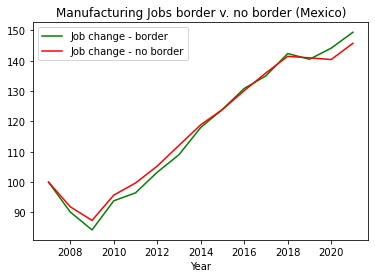

In [9]:
# Create a graphic
df3.plot(x="Year",
       y=["Job change - border", "Job change - no border"],
       title = "Manufacturing Jobs border v. no border (Mexico)",
       style = {"Job change - border":"green",
               "Job change - no border":"red"})

<AxesSubplot:title={'center':'Factories border v. no border (Mexico)'}, xlabel='Year'>

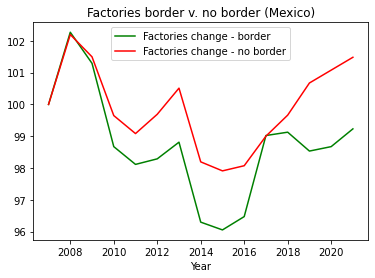

In [10]:
# Create a graphic
df3.plot(x="Year",
       y=["Factories change - border", "Factories change - no border"],
       title = "Factories border v. no border (Mexico)",
       style = {"Factories change - border":"green",
               "Factories change - no border":"red"})

<AxesSubplot:title={'center':'Manufacturing wages change border v. no border (Mexico)'}, xlabel='Year'>

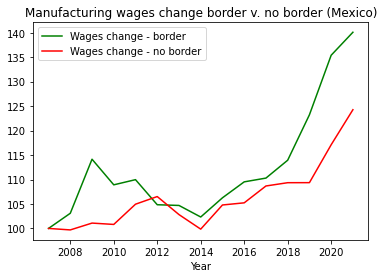

In [11]:
# Create a graphic
df3.plot(x="Year",
       y=["Wages change - border", "Wages change - no border"],
       title = "Manufacturing wages change border v. no border (Mexico)",
       style = {"Wages change - border":"green",
               "Wages change - no border":"red"})

### Conclusions (2007 v 2021)
###### The number of manufacturing jobs increased in Mexico both on border (49%) and non-border (46%) states between 2016 and 2021. 
###### The number of factories declined between 2008 and 2015, but then rebounded both border and nonborder states. Now: similar level to 2007.
###### Manufacturing wages increased more on  border (40%) and non border (24%) states.

### Comparison between 2016 and 2021

In [17]:
#Changes since 2016
df31 = df3.query("Year > 2015")
df31

,Year,Job change - border,Factories change - border,Wages change - border,Job change - no border,Factories change - no border,Wages change - no border
9,2016,130.851371,96.472232,109.517801,130.131265,98.071997,105.230467
10,2017,135.024697,99.022005,110.288505,135.988846,99.002292,108.675459
11,2018,142.374826,99.126790,113.940736,141.454980,99.662936,109.346491
12,2019,140.480885,98.533007,123.225642,140.958535,100.674127,109.356211
13,2020,144.140471,98.672721,135.398052,140.395609,101.078603,117.101112
14,2021,149.387946,99.231575,140.098436,145.750148,101.483079,124.263539


In [18]:
#Calculate percentage changes
df31 ["Year"] = df31["Year"]
df31["Job change - border"] = df31["Job change - border"] / df31["Job change - border"].iat[0] * 100 
df31["Factories change - border"] = df31["Factories change - border"] / df31["Factories change - border"].iat[0] * 100
df31["Wages change - border"] = df31["Wages change - border"] / df31["Wages change - border"].iat[0] * 100
df31["Job change - no border"] = df31["Job change - no border"] / df31["Job change - no border"].iat[0] * 100 
df31["Factories change - no border"] = df31["Factories change - no border"] / df31["Factories change - no border"].iat[0] * 100
df31["Wages change - no border"] = df31["Wages change - no border"] / df31["Wages change - no border"].iat[0] * 100 
df31

<ipython-input-18-d9d032790b9a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df31 ["Year"] = df31["Year"]
<ipython-input-18-d9d032790b9a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df31["Job change - border"] = df31["Job change - border"] / df31["Job change - border"].iat[0] * 100
<ipython-input-18-d9d032790b9a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation

,Year,Job change - border,Factories change - border,Wages change - border,Job change - no border,Factories change - no border,Wages change - no border
9,2016,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
10,2017,103.189363,102.643012,100.703725,104.501286,100.948584,103.273758
11,2018,108.806522,102.751629,104.038554,108.701764,101.622216,103.911438
12,2019,107.359123,102.136133,112.516541,108.320268,102.653286,103.920674
13,2020,110.155873,102.280956,123.631091,107.887685,103.065714,111.280615
14,2021,114.166130,102.860246,127.922981,112.002406,103.478141,118.087036


<AxesSubplot:title={'center':'Manufacturing Jobs border v. no border (Mexico)'}, xlabel='Year'>

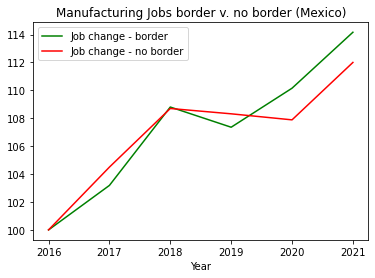

In [19]:
# Create a graphic
df31.plot(x="Year",
       y=["Job change - border", "Job change - no border"],
       title = "Manufacturing Jobs border v. no border (Mexico)",
       style = {"Job change - border":"green",
               "Job change - no border":"red"})

<AxesSubplot:title={'center':'Factories border v. no border (Mexico)'}, xlabel='Year'>

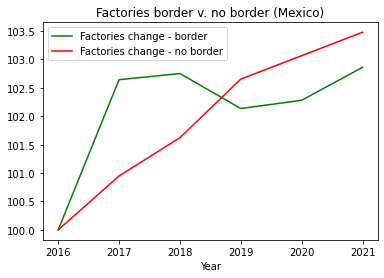

In [20]:
# Create a graphic
df31.plot(x="Year",
       y=["Factories change - border", "Factories change - no border"],
       title = "Factories border v. no border (Mexico)",
       style = {"Factories change - border":"green",
               "Factories change - no border":"red"})

<AxesSubplot:title={'center':'Manufacturing wages change border v. no border (Mexico)'}, xlabel='Year'>

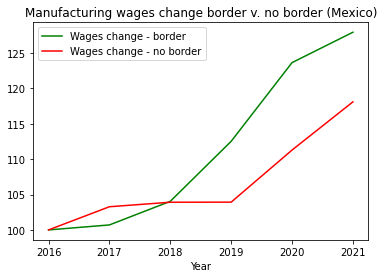

In [21]:
# Create a graphic
df31.plot(x="Year",
       y=["Wages change - border", "Wages change - no border"],
       title = "Manufacturing wages change border v. no border (Mexico)",
       style = {"Wages change - border":"green",
               "Wages change - no border":"red"})

### Conclusions (2016 v 2021)
###### The number of manufacturing jobs increased in Mexico both on border (14%) and non-border (12%) states between 2016 and 2021. 
###### The number of factories rebounded both border (3%) and nonborder (3.5%) states. 
###### Manufacturing wages increased more on  border (28%) and non border (18%) states.